<a href="https://colab.research.google.com/github/huijeong728/advanced-statistics/blob/master/20191031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN [practice](https://www.tensorflow.org/tutorials/keras/classification)


In [1]:
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


## 패션 MNIST 데이터셋 임포트하기

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 전처리

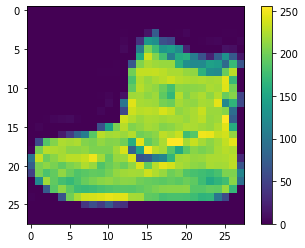

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images.shape

(60000, 28, 28)

In [0]:
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

## 모델 구성





### 층 설정

- 원래 차원은 28X28X3
- 3X3 filter들을 32개 만들어줌
- padding=same이므로 결과 차원은 28X28X32

In [9]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Sequential

model=Sequential()
model.add( Conv2D(input_shape=(28, 28, 1),
                  filters=32,kernel_size=(3, 3),strides=(1 ,1),
                  padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 훈련

In [12]:
model.fit(train_images, train_labels, epochs=1, batch_size=3000)

Train on 60000 samples
60000/60000 [==============================] - 41s 681us/sample - loss: 151.9510 - accuracy: 0.3964


# Example ConvNet

- padding = same
  - 마지막 칸을 0으로 채워서 해줌
- padding = valid
  - 마지막 칸을 무시

## 모델 구성

### 층 설정

filter 갯수는 점점 늘어남

In [51]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Sequential

model=Sequential()
model.add(Conv2D(input_shape=(28,28,1), filters=16,
          kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,
          kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

### 모델 컴파일

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 훈련

In [53]:
model.fit(train_images, train_labels, epochs=1, batch_size=3000)

Train on 60000 samples
60000/60000 [==============================] - 30s 499us/sample - loss: 8.2181 - accuracy: 0.4132


# LeNet-5 

In [46]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
model= Sequential()
model.add(Conv2D( 6, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                 input_shape =(28 ,28, 1) ,padding='same'))
model.add(AveragePooling2D(pool_size=2, strides=(1,1), padding='valid')) ##14X14여야 하는데 17X17
# 따라서 strides=(1,1)을 삭제 
model.add(Conv2D( 16, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(Conv2D( 120, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model.add(Flatten())
model.add(Dense(84,activation ='tanh'))
model.add(Dense(10, activation ='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 84)               

In [47]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
model= Sequential()
model.add(Conv2D( 6, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                 input_shape =(28 ,28, 1) ,padding='same'))
model.add(AveragePooling2D(pool_size=2, padding='valid')) 
model.add(Conv2D( 16, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(Conv2D( 120, kernel_size =(5, 5), strides=( 1, 1), activation= 'tanh',
                padding='valid'))
model.add(Flatten())
model.add(Dense(84,activation ='tanh'))
model.add(Dense(10, activation ='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

# ResNet [practice](https://github.com/keras-team/keras-contrib/blob/master/keras_contrib/applications/resnet.py)


- 깊게 쌓으면 모형이 좋아짐
- 모형을 복잡하게 해서 많이 학습시키면 성능이 좋아짐

# skip-connection network (ResNet 의 residual block)

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Conv2D, BatchNormalization, GlobalAveragePooling2D, Dropout, Dense, add 
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras import regularizers 

def block(n_output,upscale=False):
  def f(x) :
    h=BatchNormalization()(x)
    h=Activation(relu)(h)
    h=Conv2D(kernel_size=3,filters=n_output,padding='same')(h)
    h=BatchNormalization()(h)
    h=Activation(relu)(h)
    h=Conv2D(kernel_size=3,filters=n_output,padding='same')(h)
    if upscale :
      f=Conv2D(kernel_size=1,filters=n_output,strides=1,padding='same')(x)
    else :
      f=x
    return add([f,h])
  return f

In [56]:
input_shape=(28,28,1)
input_tensor=Input(input_shape)
x=Conv2D(kernel_size=3,filters=16,strides=1,padding='same')(input_tensor)
x=block(16)(x)
x=block(16)(x)
x=block(32,upscale=True)(x)
x=block(32)(x)
x=BatchNormalization()(x)
x=Activation(relu)(x)
x=GlobalAveragePooling2D()(x)
x=Dropout(0.2)(x)
x=Dense(units=10,kernel_regularizer=regularizers.l2(0.01))(x)
x=Activation(softmax)(x)
model=Model(inputs=input_tensor,outputs=x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 28, 28, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 16)   64          conv2d_9[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 28, 28, 16)   0           batch_normalization[0][0]        
______________________________________________________________________________________________